<a href="https://colab.research.google.com/github/mozzaquatro/financial_market/blob/main/04_Simulando_uma_CARTEIRA_DE_A%C3%87%C3%95ES_e_comparando_com_o_IBOVESPA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. importando bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web

!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
yf.pdr_override()

     |████████████████████████████████| 6.3 MB 5.9 MB/s 
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import seaborn as sns

2. Obtendo e tratando os dados

In [3]:
tickers = ["ABEV3.SA", "ITSA4.SA", "WEGE3.SA","USIM5.SA", "VALE3.SA"]
carteira = web.get_data_yahoo(tickers, period="5y")["Adj Close"]
ibov = web.get_data_yahoo("^BVSP", period="5y")["Adj Close"]

[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
carteira

,ABEV3.SA,ITSA4.SA,USIM5.SA,VALE3.SA,WEGE3.SA
Date,,,,,
2016-11-14,15.187107,5.816541,3.827461,19.241453,5.802783
2016-11-16,15.652378,6.006579,3.591645,18.288834,5.909714
2016-11-17,15.468028,5.864051,3.573506,17.990686,5.781397
2016-11-18,15.204664,5.959070,3.618855,17.867065,5.856249
2016-11-21,15.318787,6.020154,3.709553,18.783323,5.685159
...,...,...,...,...,...
2021-11-08,17.740000,10.150000,12.600000,67.599998,37.099998
2021-11-09,17.889999,10.040000,12.760000,65.940002,36.790001
2021-11-10,17.750000,10.270000,12.670000,65.690002,36.279999


In [5]:
ibov

Date
2016-11-14     59657.000000
2016-11-16     60759.000000
2016-11-17     59770.000000
2016-11-18     59962.000000
2016-11-21     61070.000000
                  ...      
2021-11-08    104781.000000
2021-11-09    105535.000000
2021-11-10    105968.000000
2021-11-11    107725.000000
2021-11-12    106334.539062
Name: Adj Close, Length: 1225, dtype: float64

3. Resultados

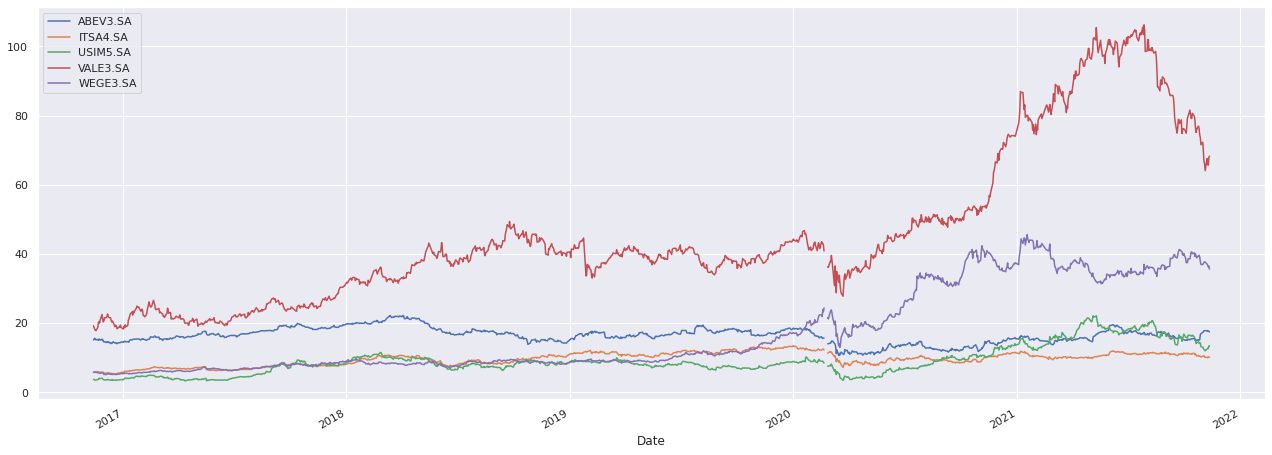

In [6]:
sns.set()
carteira.plot(figsize=(22,8))

normalizado pelo primeiro e comprando 10k acoes

In [7]:
carteira_normalizada = (carteira/carteira.iloc[0])*1000
carteira_normalizada

,ABEV3.SA,ITSA4.SA,USIM5.SA,VALE3.SA,WEGE3.SA
Date,,,,,
2016-11-14,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
2016-11-16,1030.635920,1032.671947,938.388640,950.491289,1018.427573
2016-11-17,1018.497333,1008.168110,933.649309,934.996243,996.314502
2016-11-18,1001.156056,1024.504083,945.497667,928.571521,1009.213828
2016-11-21,1008.670482,1035.005904,969.194258,976.190474,979.729678
...,...,...,...,...,...
2021-11-08,1168.096048,1745.023250,3292.000085,3513.248083,6393.483678
2021-11-09,1177.972822,1726.111726,3333.803220,3426.976219,6340.061456
2021-11-10,1168.754517,1765.654212,3310.288894,3413.983438,6252.172225


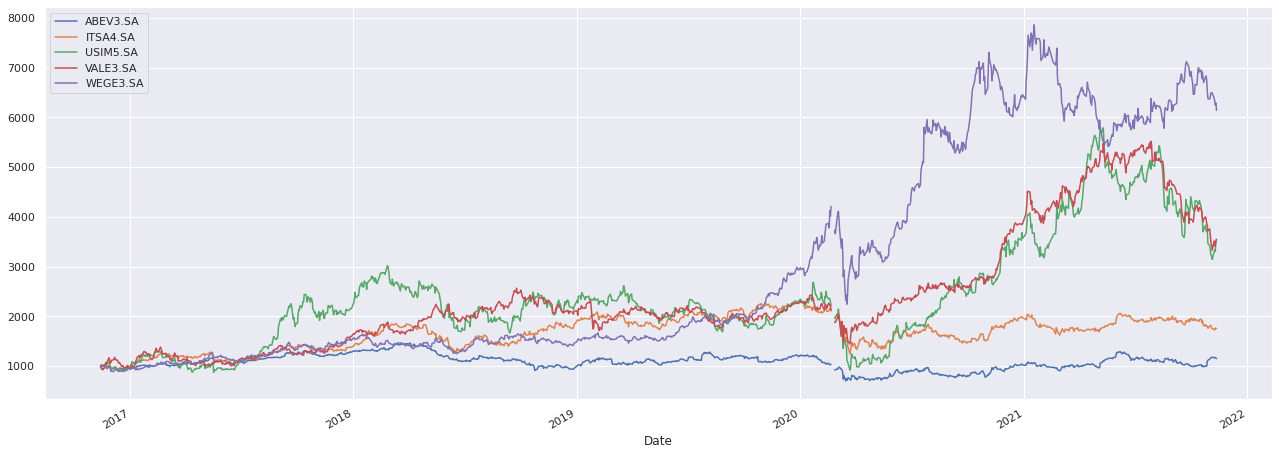

In [8]:
carteira_normalizada.plot(figsize=(22,8))

In [9]:
carteira_normalizada["saldo"]=carteira_normalizada.sum(axis=1)
carteira_normalizada

,ABEV3.SA,ITSA4.SA,USIM5.SA,VALE3.SA,WEGE3.SA,saldo
Date,,,,,,
2016-11-14,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,5000.000000
2016-11-16,1030.635920,1032.671947,938.388640,950.491289,1018.427573,4970.615369
2016-11-17,1018.497333,1008.168110,933.649309,934.996243,996.314502,4891.625497
2016-11-18,1001.156056,1024.504083,945.497667,928.571521,1009.213828,4908.943155
2016-11-21,1008.670482,1035.005904,969.194258,976.190474,979.729678,4968.790795
...,...,...,...,...,...,...
2021-11-08,1168.096048,1745.023250,3292.000085,3513.248083,6393.483678,16111.851144
2021-11-09,1177.972822,1726.111726,3333.803220,3426.976219,6340.061456,16004.925443
2021-11-10,1168.754517,1765.654212,3310.288894,3413.983438,6252.172225,15910.853285


In [10]:
ibov_normalizado = (ibov/ibov.iloc[0])*5000
ibov_normalizado

Date
2016-11-14    5000.000000
2016-11-16    5092.361332
2016-11-17    5009.470808
2016-11-18    5025.562801
2016-11-21    5118.427008
                 ...     
2021-11-08    8781.953501
2021-11-09    8845.148097
2021-11-10    8881.438892
2021-11-11    9028.697387
2021-11-12    8912.159433
Name: Adj Close, Length: 1225, dtype: float64

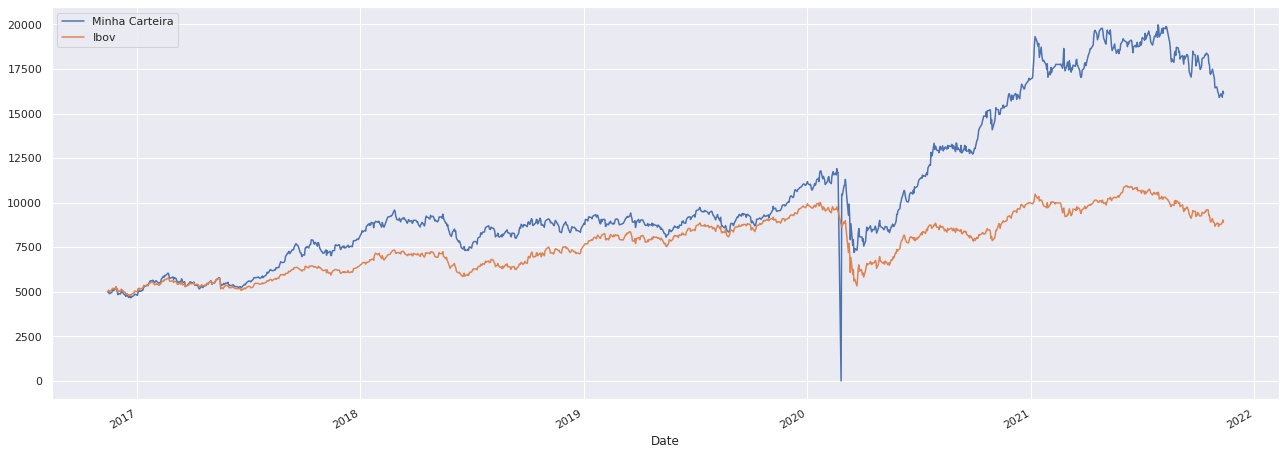

In [11]:
carteira_normalizada["saldo"].plot(figsize=(22,8), label="Minha Carteira")
ibov_normalizado.plot(label="Ibov")
plt.legend()